<a href="https://colab.research.google.com/github/SuleymanToklu/AI/blob/main/cov_19_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

In [44]:
df = pd.read_csv("COV19.csv")

/tmp/ipython-input-3971621063.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("COV19.csv")


In [45]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN


In [46]:
original_columns = df.columns.tolist()
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
print("\n--- Column names have been standardized ---")
print("Original:", original_columns)
print("New:", df.columns.tolist())


--- Column names have been standardized ---
Original: ['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month', 'MMWR Week', 'Week-Ending Date', 'HHS Region', 'Race and Hispanic Origin Group', 'Age Group', 'COVID-19 Deaths', 'Total Deaths', 'Footnote']
New: ['data_as_of', 'start_date', 'end_date', 'group', 'year', 'month', 'mmwr_week', 'week_ending_date', 'hhs_region', 'race_and_hispanic_origin_group', 'age_group', 'covid_19_deaths', 'total_deaths', 'footnote']


In [47]:
date_columns = ['week_ending_date', 'start_date', 'end_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
print(f"\n--- Converted '{', '.join(date_columns)}' to datetime format ---")


--- Converted 'week_ending_date, start_date, end_date' to datetime format ---


In [48]:
df.head()

,data_as_of,start_date,end_date,group,year,month,mmwr_week,week_ending_date,hhs_region,race_and_hispanic_origin_group,age_group,covid_19_deaths,total_deaths,footnote
0,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,40-49 years,0.0,325.0,NaN


In [49]:
df.tail()

,data_as_of,start_date,end_date,group,year,month,mmwr_week,week_ending_date,hhs_region,race_and_hispanic_origin_group,age_group,covid_19_deaths,total_deaths,footnote
194035,09/27/2023,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,09/27/2023,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,50-64 years,19.0,457.0,NaN
194037,09/27/2023,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,65-74 years,15.0,446.0,NaN
194038,09/27/2023,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,75-84 years,17.0,243.0,NaN
194039,09/27/2023,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,85 years and over,10.0,113.0,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194040 entries, 0 to 194039
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_as_of                      194040 non-null  object        
 1   start_date                      194040 non-null  datetime64[ns]
 2   end_date                        194040 non-null  datetime64[ns]
 3   group                           194040 non-null  object        
 4   year                            194040 non-null  object        
 5   month                           35640 non-null   float64       
 6   mmwr_week                       154440 non-null  float64       
 7   week_ending_date                154440 non-null  datetime64[ns]
 8   hhs_region                      194040 non-null  object        
 9   race_and_hispanic_origin_group  194040 non-null  object        
 10  age_group                       194040 non-null  object 

In [51]:
print(df.isnull().sum())

data_as_of                             0
start_date                             0
end_date                               0
group                                  0
year                                   0
month                             158400
mmwr_week                          39600
week_ending_date                   39600
hhs_region                             0
race_and_hispanic_origin_group         0
age_group                              0
covid_19_deaths                    41227
total_deaths                       64442
footnote                           98450
dtype: int64


In [52]:
print("--- Footnote Analysis ---")
print(df['footnote'].value_counts(dropna=False))

print("\n--- Analysis of Rows with Missing Dates ---")
print(df[df['week_ending_date'].isnull()]['group'].value_counts())


--- Footnote Analysis ---
footnote
NaN                                                                                                                           98450
One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    95590
Name: count, dtype: int64

--- Analysis of Rows with Missing Dates ---
group
By Month    35640
By Year      3168
By Total      792
Name: count, dtype: int64


In [53]:
df['covid_19_deaths'].fillna(0, inplace=True)
df['total_deaths'].fillna(0, inplace=True)
print("\n--- Filled missing death counts with 0 ---")

original_rows = len(df)
df.dropna(subset=['week_ending_date'], inplace=True)
print(f"--- Removed {original_rows - len(df)} rows with no weekly data ---")


--- Filled missing death counts with 0 ---
--- Removed 39600 rows with no weekly data ---


/tmp/ipython-input-3908519312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['covid_19_deaths'].fillna(0, inplace=True)
/tmp/ipython-input-3908519312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [54]:
columns_to_drop = ['data_as_of', 'start_date', 'end_date', 'month', 'mmwr_week', 'footnote', 'year']
df.drop(columns=columns_to_drop, inplace=True)
print(f"--- Dropped unnecessary columns: {columns_to_drop} ---")

print("\n--- Final Missing Values Check ---")
print(df.isnull().sum())

print("\n--- Data is now clean and ready for exploration! ---")
print("\n--- Head of Final DataFrame ---")
print(df.head())

--- Dropped unnecessary columns: ['data_as_of', 'start_date', 'end_date', 'month', 'mmwr_week', 'footnote', 'year'] ---

--- Final Missing Values Check ---
group                             0
week_ending_date                  0
hhs_region                        0
race_and_hispanic_origin_group    0
age_group                         0
covid_19_deaths                   0
total_deaths                      0
dtype: int64

--- Data is now clean and ready for exploration! ---

--- Head of Final DataFrame ---
     group week_ending_date     hhs_region race_and_hispanic_origin_group  \
0  By Week       2020-01-04  United States                       Hispanic   
1  By Week       2020-01-04  United States                       Hispanic   
2  By Week       2020-01-04  United States                       Hispanic   
3  By Week       2020-01-04  United States                       Hispanic   
4  By Week       2020-01-04  United States                       Hispanic   

     age_group  covid_19_deat

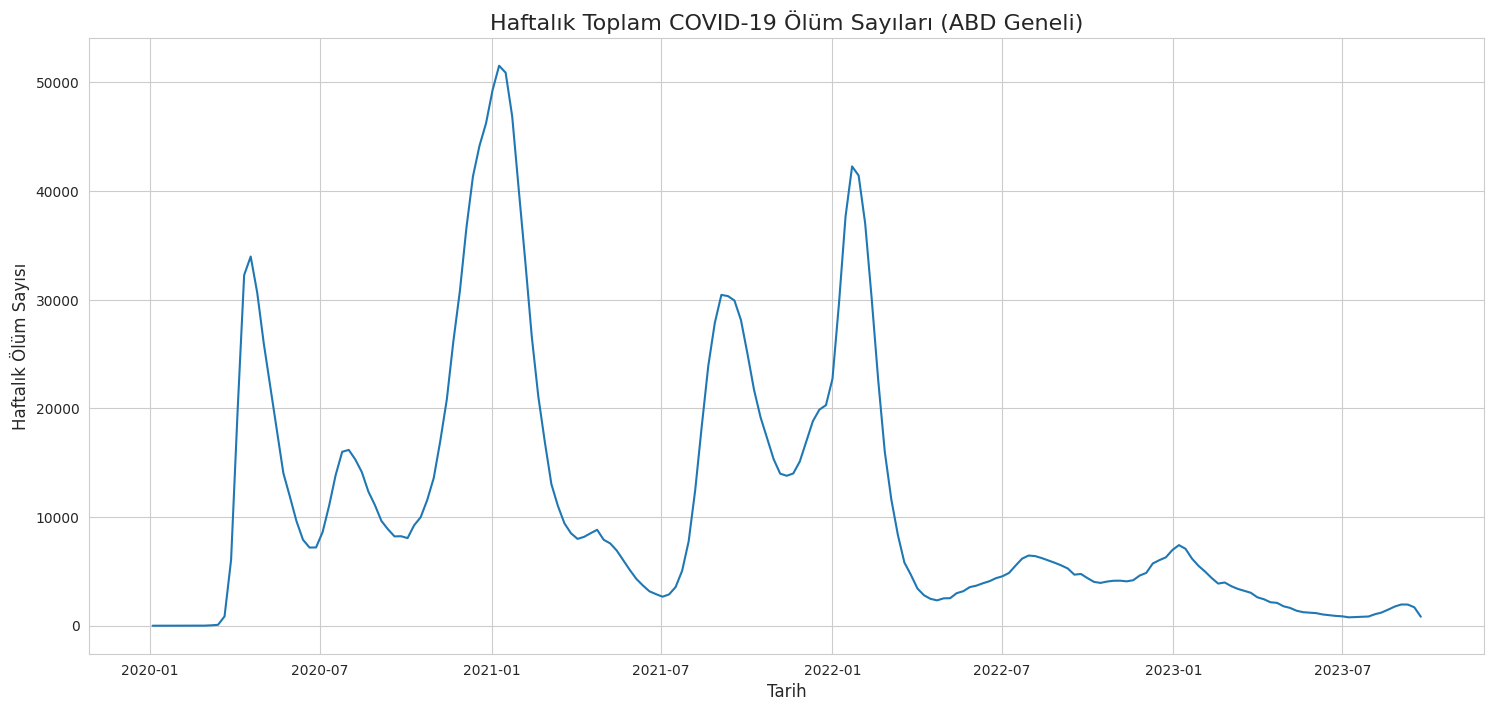

In [55]:
weekly_deaths = df.groupby('week_ending_date')['covid_19_deaths'].sum().reset_index()

plt.figure(figsize=(18, 8))
sns.lineplot(x='week_ending_date', y='covid_19_deaths', data=weekly_deaths)
plt.title('Haftalık Toplam COVID-19 Ölüm Sayıları (ABD Geneli)', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Haftalık Ölüm Sayısı', fontsize=12)
plt.show()

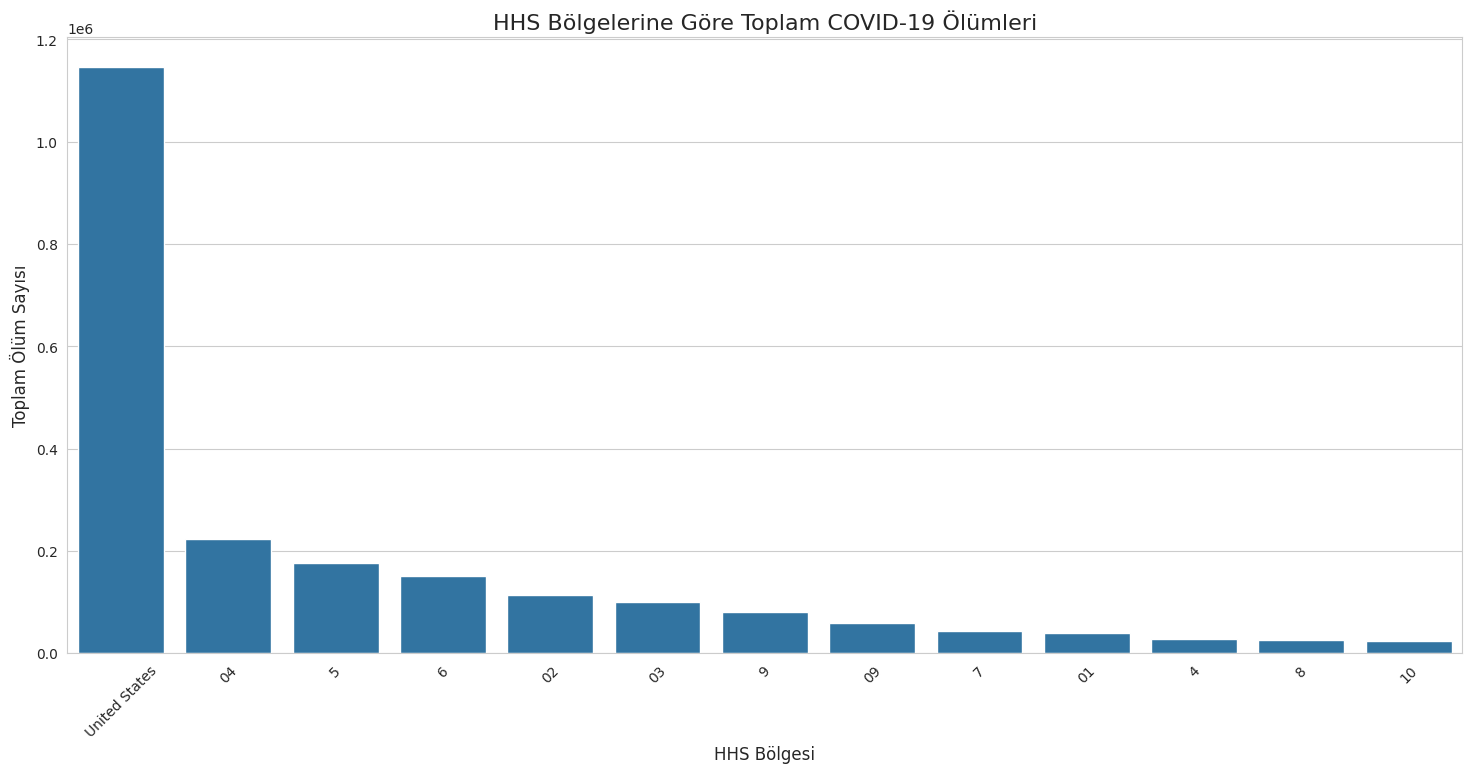

In [56]:
region_deaths = df.groupby('hhs_region')['covid_19_deaths'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(18, 8))
sns.barplot(x='hhs_region', y='covid_19_deaths', data=region_deaths, order=region_deaths['hhs_region'])
plt.title('HHS Bölgelerine Göre Toplam COVID-19 Ölümleri', fontsize=16)
plt.xlabel('HHS Bölgesi', fontsize=12)
plt.ylabel('Toplam Ölüm Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.show()

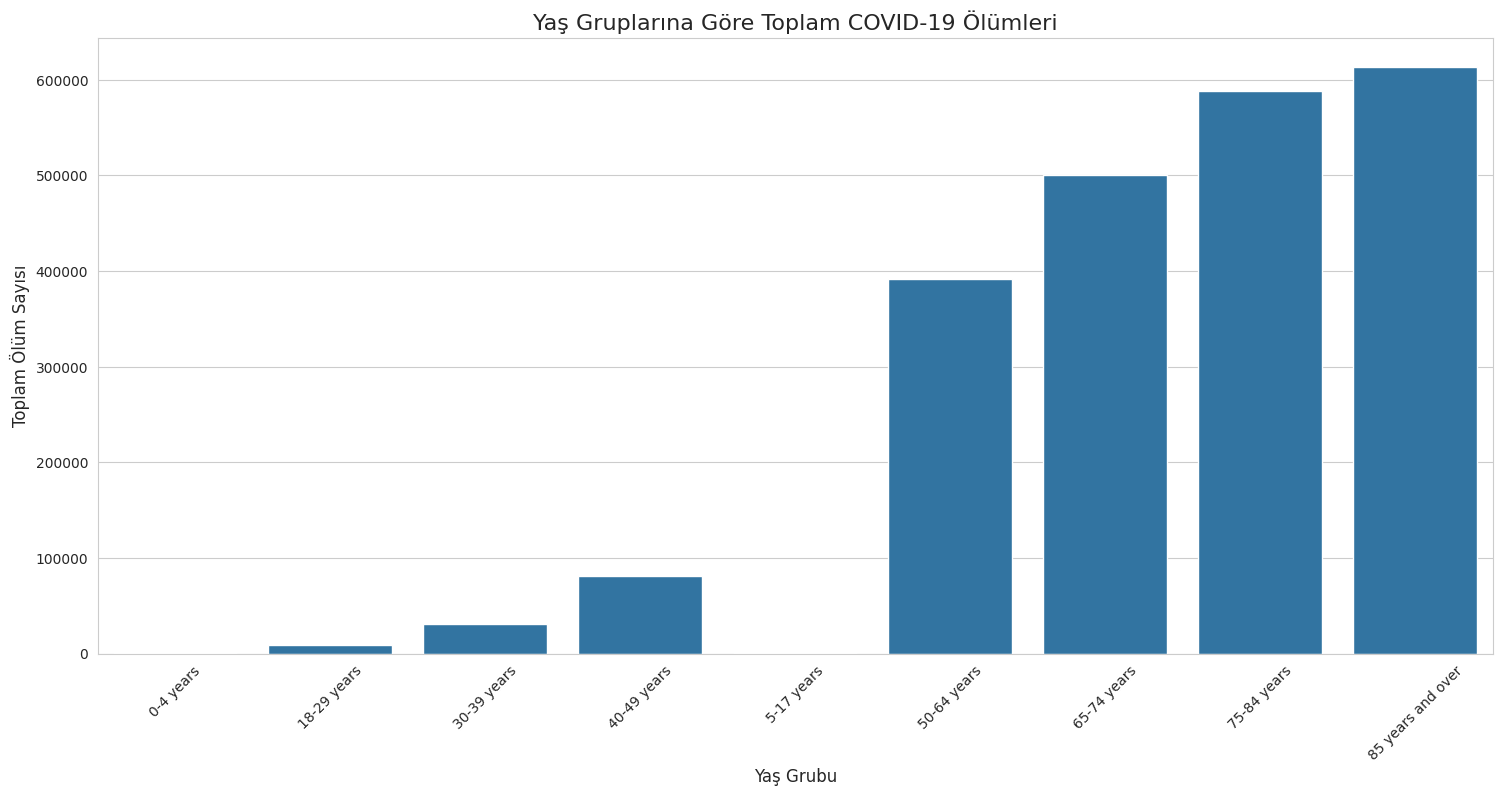

In [57]:
age_order = sorted(df['age_group'].unique())

age_deaths = df.groupby('age_group')['covid_19_deaths'].sum().reindex(age_order).reset_index()

plt.figure(figsize=(18, 8))
sns.barplot(x='age_group', y='covid_19_deaths', data=age_deaths, order=age_order)
plt.title('Yaş Gruplarına Göre Toplam COVID-19 Ölümleri', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Toplam Ölüm Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.show()

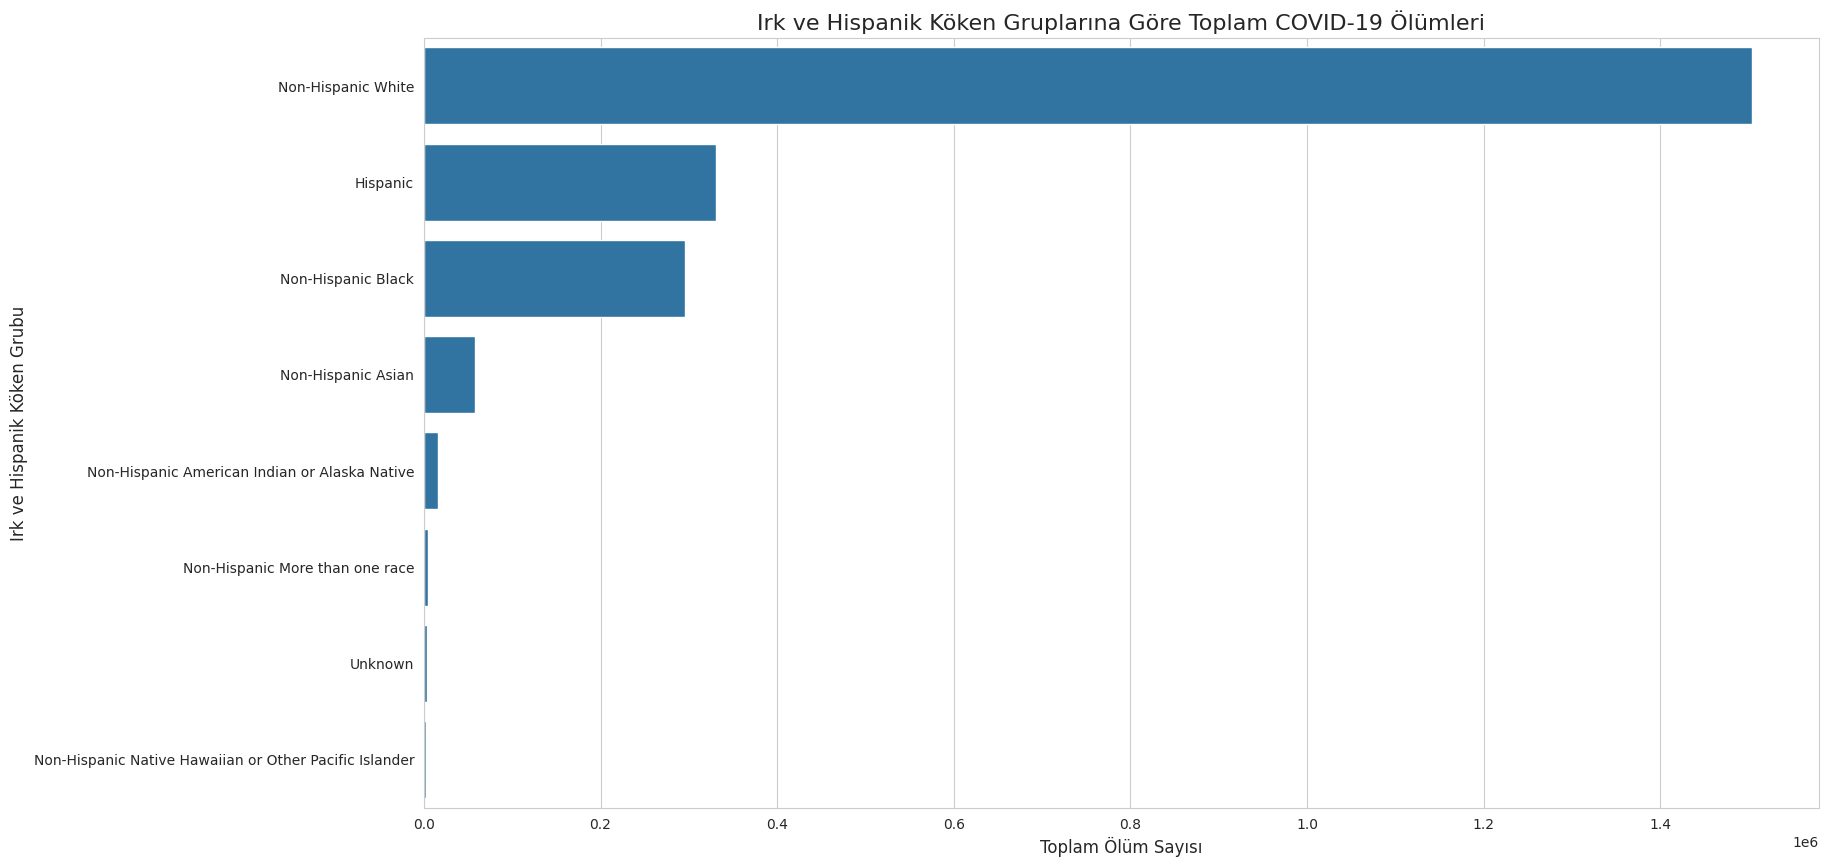

In [58]:
race_deaths = df.groupby('race_and_hispanic_origin_group')['covid_19_deaths'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(x='covid_19_deaths', y='race_and_hispanic_origin_group', data=race_deaths, orient='h')
plt.title('Irk ve Hispanik Köken Gruplarına Göre Toplam COVID-19 Ölümleri', fontsize=16)
plt.xlabel('Toplam Ölüm Sayısı', fontsize=12)
plt.ylabel('Irk ve Hispanik Köken Grubu', fontsize=12)
plt.show()

In [59]:
print("--- Starting Feature Engineering for Clustering ---")

region_features = df.groupby('hhs_region').agg(
    total_covid_deaths=('covid_19_deaths', 'sum'),
    total_deaths_all_causes=('total_deaths', 'sum')
).reset_index()

--- Starting Feature Engineering for Clustering ---


In [60]:
epsilon = 1e-6
region_features['covid_to_total_death_ratio'] = \
    region_features['total_covid_deaths'] / (region_features['total_deaths_all_causes'] + epsilon)

In [61]:
older_age_groups = ['65-74 years', '75-84 years', '85 years and over']

In [62]:
older_deaths_df = df[df['age_group'].isin(older_age_groups)].groupby('hhs_region')['covid_19_deaths'].sum().reset_index()
older_deaths_df.rename(columns={'covid_19_deaths': 'older_covid_deaths'}, inplace=True)

In [63]:
region_features = pd.merge(region_features, older_deaths_df, on='hhs_region', how='left')

In [64]:
region_features['pct_deaths_over_65'] = \
    (region_features['older_covid_deaths'] / (region_features['total_covid_deaths'] + epsilon)) * 100

In [65]:
region_features.drop(columns=['older_covid_deaths'], inplace=True)

In [66]:
region_features.set_index('hhs_region', inplace=True)

In [67]:
print("\n--- Feature Engineering Complete. Here is the resulting DataFrame: ---")
print(region_features)


--- Feature Engineering Complete. Here is the resulting DataFrame: ---
               total_covid_deaths  total_deaths_all_causes  \
hhs_region                                                   
4                         28147.0                 875817.0   
5                        175761.0                2055484.0   
6                        151739.0                1515896.0   
7                         44160.0                 564552.0   
8                         26879.0                 366911.0   
9                         80983.0                 575744.0   
01                        39583.0                 534112.0   
02                       113889.0                1092640.0   
03                       100905.0                1222723.0   
04                       223680.0                1964601.0   
09                        59726.0                1036409.0   
10                        24425.0                 463904.0   
United States           1146769.0               12328085.0  

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


scaler = StandardScaler()
features_scaled = scaler.fit_transform(region_features)

features_scaled_df = pd.DataFrame(features_scaled, index=region_features.index, columns=region_features.columns)

print("--- Scaled Features for Clustering ---")
print(features_scaled_df.head())

--- Scaled Features for Clustering ---
            total_covid_deaths  total_deaths_all_causes  \
hhs_region                                                
4                    -0.493931                -0.332225   
5                     0.018214                 0.053423   
6                    -0.065130                -0.122975   
7                    -0.438374                -0.433982   
8                    -0.498330                -0.498593   

            covid_to_total_death_ratio  pct_deaths_over_65  
hhs_region                                                  
4                            -1.909947            1.618413  
5                             0.067561            0.163946  
6                             0.608167           -1.586811  
7                            -0.202441            0.466267  
8                            -0.386362            0.553739  


In [69]:
inertia_values = []
possible_k_values = range(1, 10) # We'll test k from 1 to 9

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled_df)
    inertia_values.append(kmeans.inertia_)

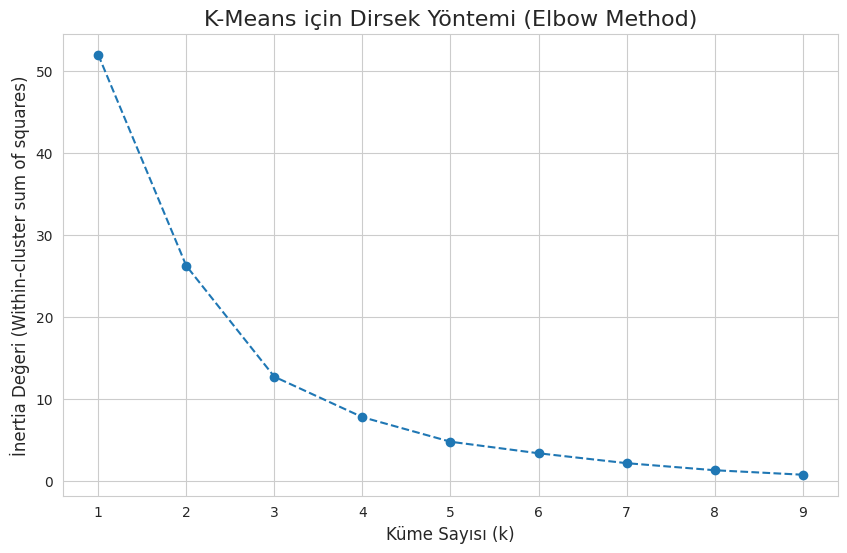

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o', linestyle='--')
plt.title('K-Means için Dirsek Yöntemi (Elbow Method)', fontsize=16)
plt.xlabel('Küme Sayısı (k)', fontsize=12)
plt.ylabel('İnertia Değeri (Within-cluster sum of squares)', fontsize=12)
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

In [71]:
# dirsek =3
OPTIMAL_K = 3

kmeans = KMeans(n_clusters=OPTIMAL_K, n_init=10, random_state=42)
kmeans.fit(features_scaled_df)

clusters = kmeans.labels_

region_features['cluster'] = clusters

In [72]:
print(f"--- Regions have been grouped into {OPTIMAL_K} clusters. ---")
print("\n--- Cluster Profiles (Feature Averages per Cluster) ---")

cluster_profiles = region_features.groupby('cluster').mean()
print(cluster_profiles)


print("\n--- Regions in Each Cluster ---")
for i in range(OPTIMAL_K):
    print(f"\nCluster {i}:")
    print(region_features[region_features['cluster'] == i].index.tolist())

--- Regions have been grouped into 3 clusters. ---

--- Cluster Profiles (Feature Averages per Cluster) ---
         total_covid_deaths  total_deaths_all_causes  \
cluster                                                
0                 142572.75               1287220.25   
1                1146769.00              12328085.00   
2                  62448.25                889989.00   

         covid_to_total_death_ratio  pct_deaths_over_65  
cluster                                                  
0                          0.114711           75.166142  
1                          0.093021           75.763122  
2                          0.067005           82.982828  

--- Regions in Each Cluster ---

Cluster 0:
[6, 9, '02', '04']

Cluster 1:
['United States']

Cluster 2:
[4, 5, 7, 8, '01', '03', '09', '10']


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

cluster_mapping = region_features[region_features['cluster'] != 1]['cluster'].to_dict()

df_class = df[df['hhs_region'].isin(cluster_mapping.keys())].copy()
df_class['cluster'] = df_class['hhs_region'].map(cluster_mapping)

In [74]:
df_class.sort_values(by=['hhs_region', 'week_ending_date'], inplace=True)

rolling_features = ['covid_19_deaths', 'total_deaths']
for feature in rolling_features:
    df_class[f'{feature}_rolling_4wk_avg'] = df_class.groupby('hhs_region')[feature].rolling(window=4).mean().reset_index(level=0, drop=True)

df_class.dropna(inplace=True)

In [75]:
features_for_model = [
    'covid_19_deaths',
    'total_deaths',
    'covid_19_deaths_rolling_4wk_avg',
    'total_deaths_rolling_4wk_avg'
]
X = df_class[features_for_model]

y = df_class['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
print("--- Data Preparation for Classification is Complete ---")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")
print("\n--- Features (X) Head ---")
print(X_train.head())
print("\n--- Target (y) Head ---")
print(y_train.head())

--- Data Preparation for Classification is Complete ---
Training set has 112291 samples.
Testing set has 28073 samples.

--- Features (X) Head ---
        covid_19_deaths  total_deaths  covid_19_deaths_rolling_4wk_avg  \
95182               0.0           0.0                             0.00   
104287              0.0           0.0                             0.00   
71919               0.0           0.0                           104.25   
36996              30.0         564.0                            12.25   
40489               0.0          40.0                             0.00   

        total_deaths_rolling_4wk_avg  
95182                           0.00  
104287                          6.75  
71919                        1550.75  
36996                         281.25  
40489                          22.50  

--- Target (y) Head ---
95182     0
104287    2
71919     2
36996     0
40489     0
Name: cluster, dtype: int64


In [77]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1 , class_weight='balanced') # balanced eklenmeden önce

print("--- Training the RandomForest model... ---")
model.fit(X_train, y_train)
print("--- Training complete! ---")

--- Training the RandomForest model... ---
--- Training complete! ---


# balanced eklenmeden önce

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("--- Training the RandomForest model... ---")
model.fit(X_train, y_train)
print("--- Training complete! ---")

print("\n--- Making predictions on the test set... ---")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\n--- Classification Report ---")

print(classification_report(y_test, y_pred, target_names=['Cluster 0 (Merkez Üssü)', 'Cluster 2 (Yaşlı Hassas)']))


--- Making predictions on the test set... ---

Model Accuracy: 0.7276

--- Classification Report ---
                          precision    recall  f1-score   support

 Cluster 0 (Merkez Üssü)       0.59      0.29      0.39      8431
Cluster 2 (Yaşlı Hassas)       0.75      0.91      0.82     19642

                accuracy                           0.73     28073
               macro avg       0.67      0.60      0.61     28073
            weighted avg       0.70      0.73      0.69     28073



In [78]:
print("\n--- Making predictions on the test set... ---")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\n--- Classification Report ---")

print(classification_report(y_test, y_pred, target_names=['Cluster 0 (Merkez Üssü)', 'Cluster 2 (Yaşlı Hassas)']))


--- Making predictions on the test set... ---

Model Accuracy: 0.7157

--- Classification Report ---
                          precision    recall  f1-score   support

 Cluster 0 (Merkez Üssü)       0.54      0.34      0.42      8431
Cluster 2 (Yaşlı Hassas)       0.76      0.88      0.81     19642

                accuracy                           0.72     28073
               macro avg       0.65      0.61      0.61     28073
            weighted avg       0.69      0.72      0.69     28073




--- Visualizing Rolling Averages by Cluster ---


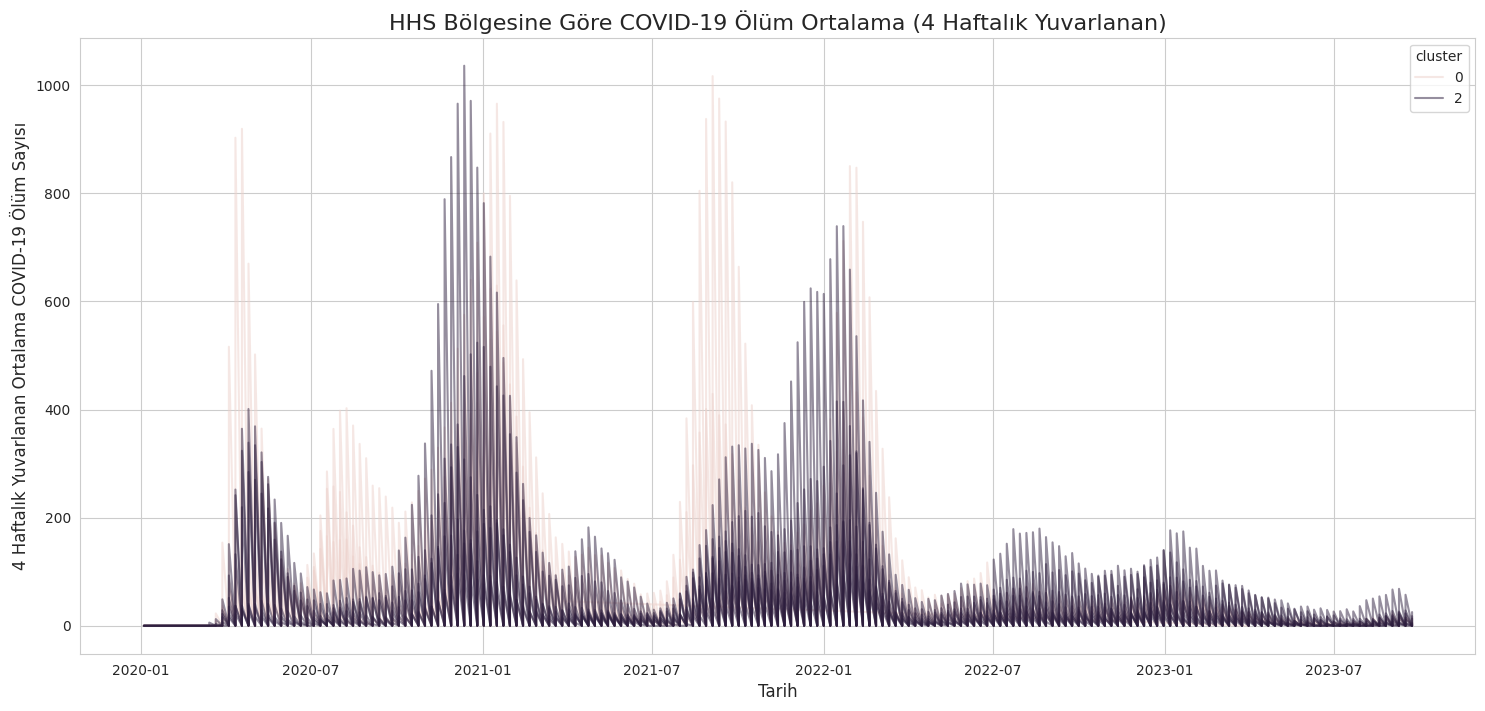

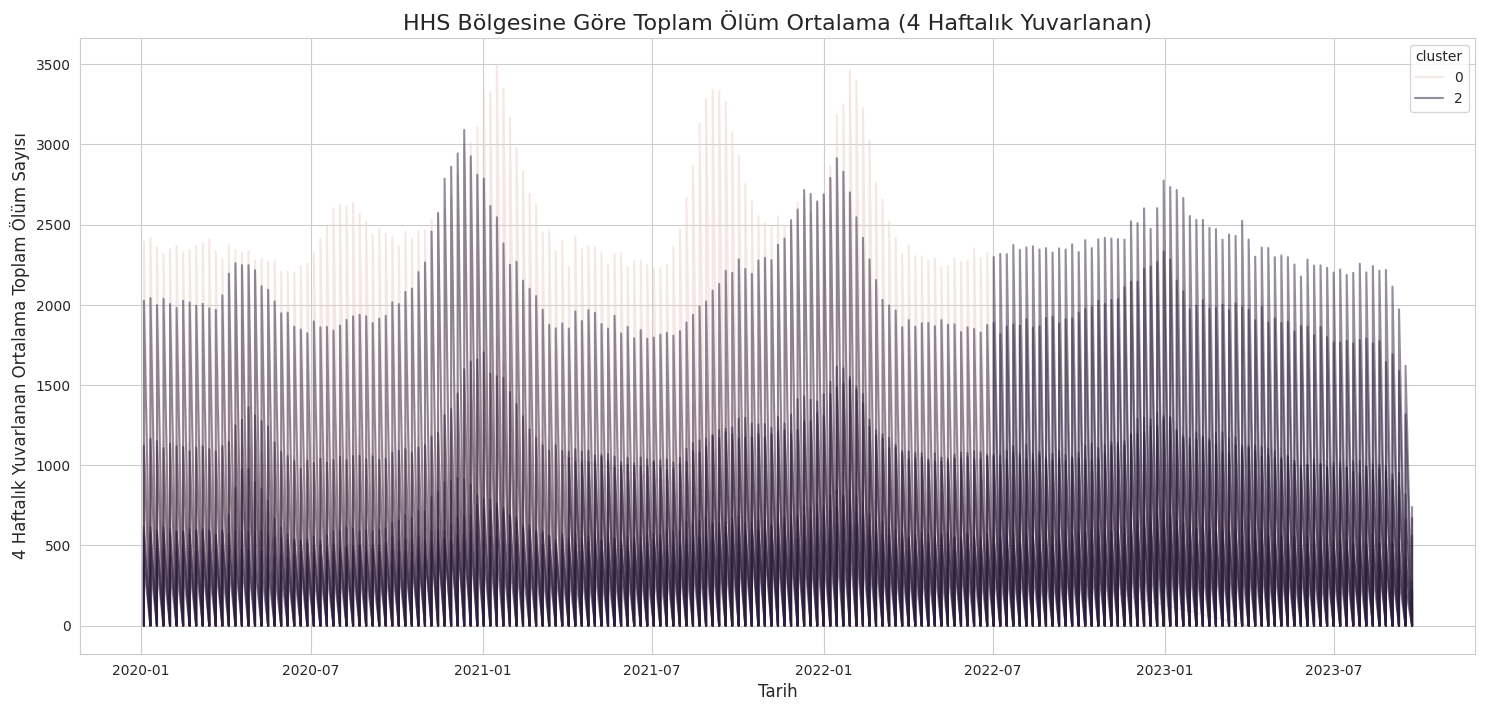

In [80]:
print("\n--- Visualizing Rolling Averages by Cluster ---")

df_class_plot = pd.merge(df_class, region_features[['cluster']], left_on='hhs_region', right_index=True, how='left')


df_class_plot.rename(columns={'cluster_y': 'cluster'}, inplace=True)

df_class_plot = df_class_plot[df_class_plot['hhs_region'] != 'United States'].copy()


plt.figure(figsize=(18, 8))
sns.lineplot(data=df_class_plot, x='week_ending_date', y='covid_19_deaths_rolling_4wk_avg', hue='cluster', estimator=None, units='hhs_region', alpha=0.5)
plt.title('HHS Bölgesine Göre COVID-19 Ölüm Ortalama (4 Haftalık Yuvarlanan)', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('4 Haftalık Yuvarlanan Ortalama COVID-19 Ölüm Sayısı', fontsize=12)
plt.show()

plt.figure(figsize=(18, 8))
sns.lineplot(data=df_class_plot, x='week_ending_date', y='total_deaths_rolling_4wk_avg', hue='cluster', estimator=None, units='hhs_region', alpha=0.5)
plt.title('HHS Bölgesine Göre Toplam Ölüm Ortalama (4 Haftalık Yuvarlanan)', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('4 Haftalık Yuvarlanan Ortalama Toplam Ölüm Sayısı', fontsize=12)
plt.show()


--- Analysis of Feature Engineered Columns ---

--- Descriptive Statistics ---
       total_covid_deaths  total_deaths_all_causes  \
count        1.300000e+01             1.300000e+01   
mean         1.705112e+05             1.892068e+06   
std          2.999961e+05             3.183823e+06   
min          2.442500e+04             3.669110e+05   
25%          3.958300e+04             5.645520e+05   
50%          8.098300e+04             1.036409e+06   
75%          1.517390e+05             1.515896e+06   
max          1.146769e+06             1.232808e+07   

       covid_to_total_death_ratio  pct_deaths_over_65  
count                   13.000000           13.000000  
mean                     0.083685           80.022332  
std                      0.028091            5.970601  
min                      0.032138           70.919803  
25%                      0.073258           75.154045  
50%                      0.082525           81.197482  
75%                      0.100099        

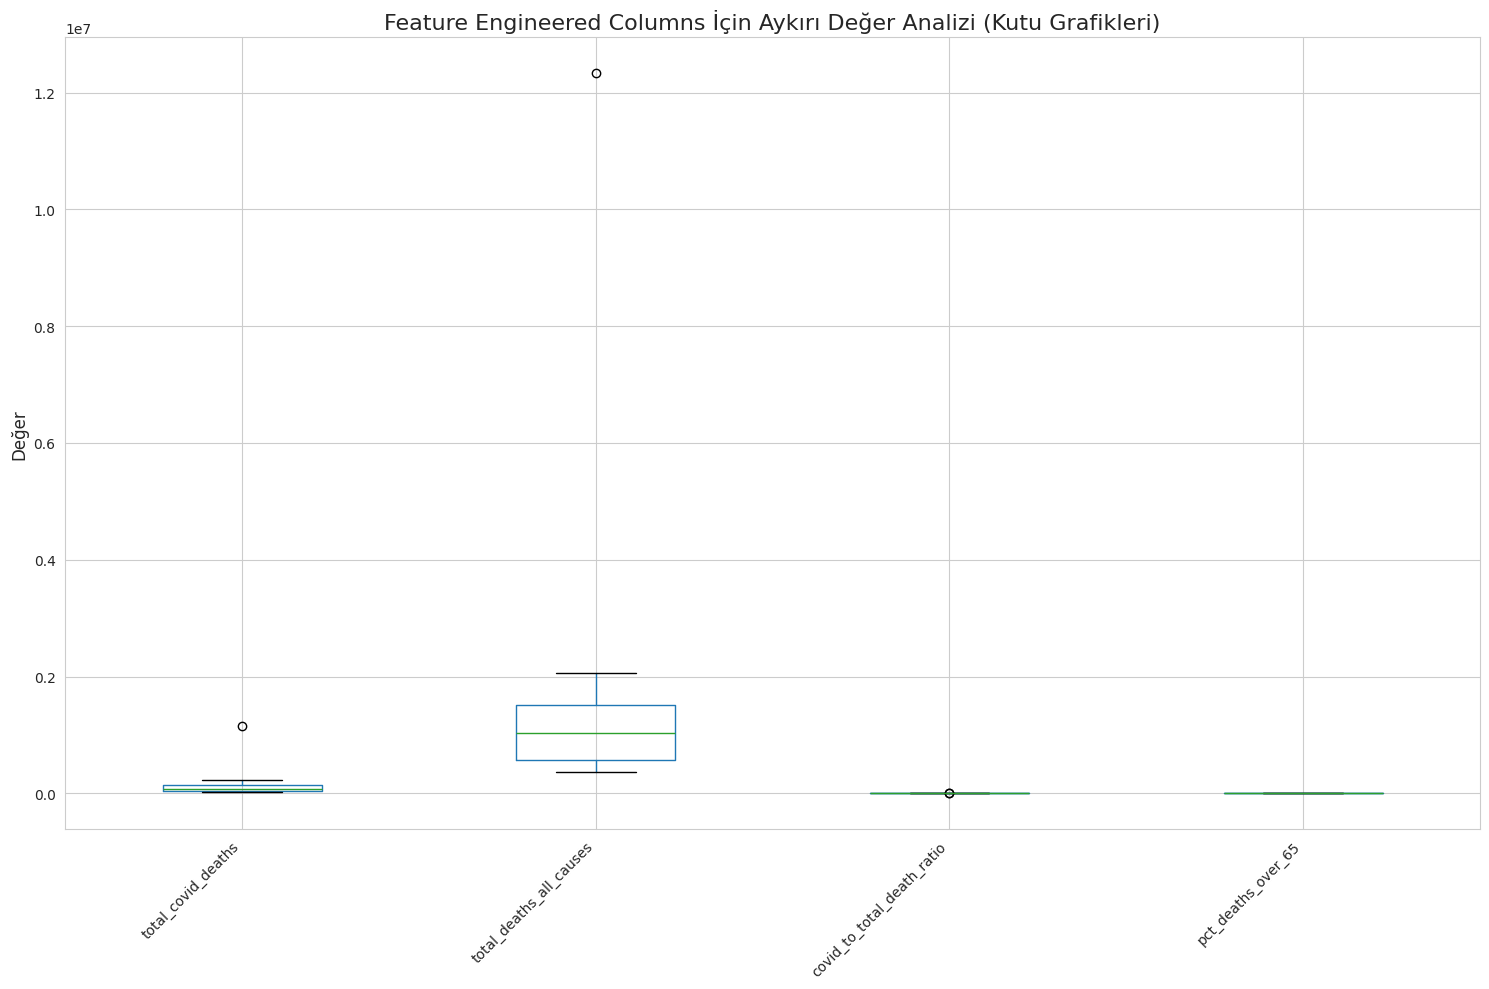

In [81]:
print("\n--- Analysis of Feature Engineered Columns ---")

# Select the feature engineered columns from the region_features DataFrame
feature_engineered_columns = ['total_covid_deaths', 'total_deaths_all_causes', 'covid_to_total_death_ratio', 'pct_deaths_over_65']

# Display descriptive statistics
print("\n--- Descriptive Statistics ---")
print(region_features[feature_engineered_columns].describe())

# Visualize outliers using box plots
print("\n--- Visualizing Outliers with Box Plots ---")
plt.figure(figsize=(15, 10))
region_features[feature_engineered_columns].boxplot()
plt.title('Feature Engineered Columns İçin Aykırı Değer Analizi (Kutu Grafikleri)', fontsize=16)
plt.ylabel('Değer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Visualizing Cluster and Class Proportions ---


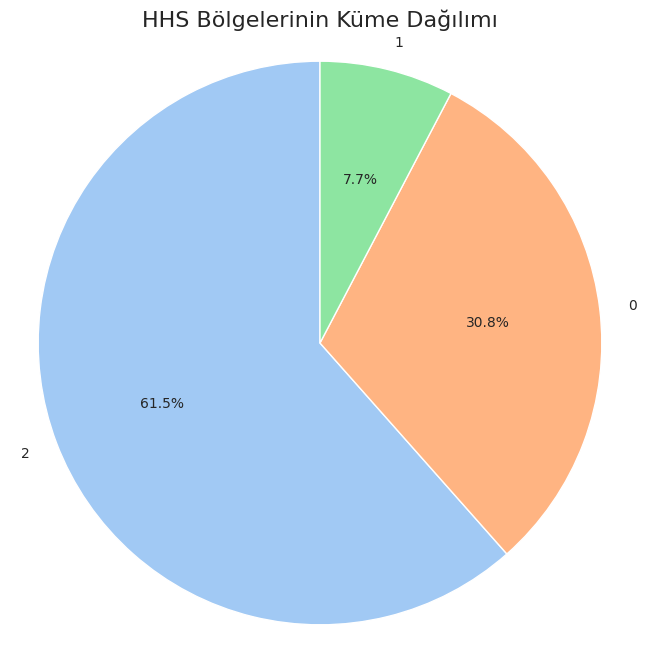

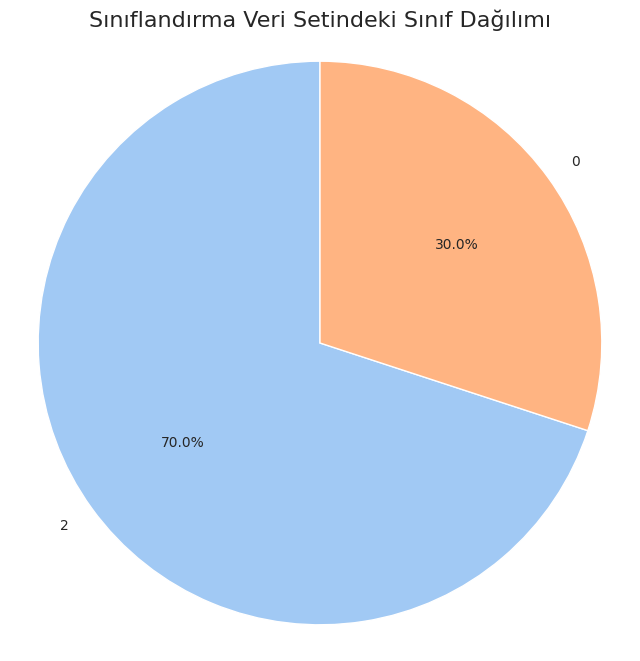

In [82]:
print("\n--- Visualizing Cluster and Class Proportions ---")

# Calculate cluster counts from the region_features DataFrame
cluster_counts = region_features['cluster'].value_counts()

# Create a pie chart for cluster proportions
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('HHS Bölgelerinin Küme Dağılımı', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculate class counts from the classification target variable (y)
class_counts = y.value_counts()

# Create a pie chart for class proportions in the classification dataset
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sınıflandırma Veri Setindeki Sınıf Dağılımı', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()